In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [2]:
data_set=pd.read_csv("housedataset/train.csv")

In [3]:
print(data_set[:1])

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  

[1 rows x 81 columns]


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data_set.shape

(1460, 81)

In [6]:
data_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
data_set["MSZoning"].describe()

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

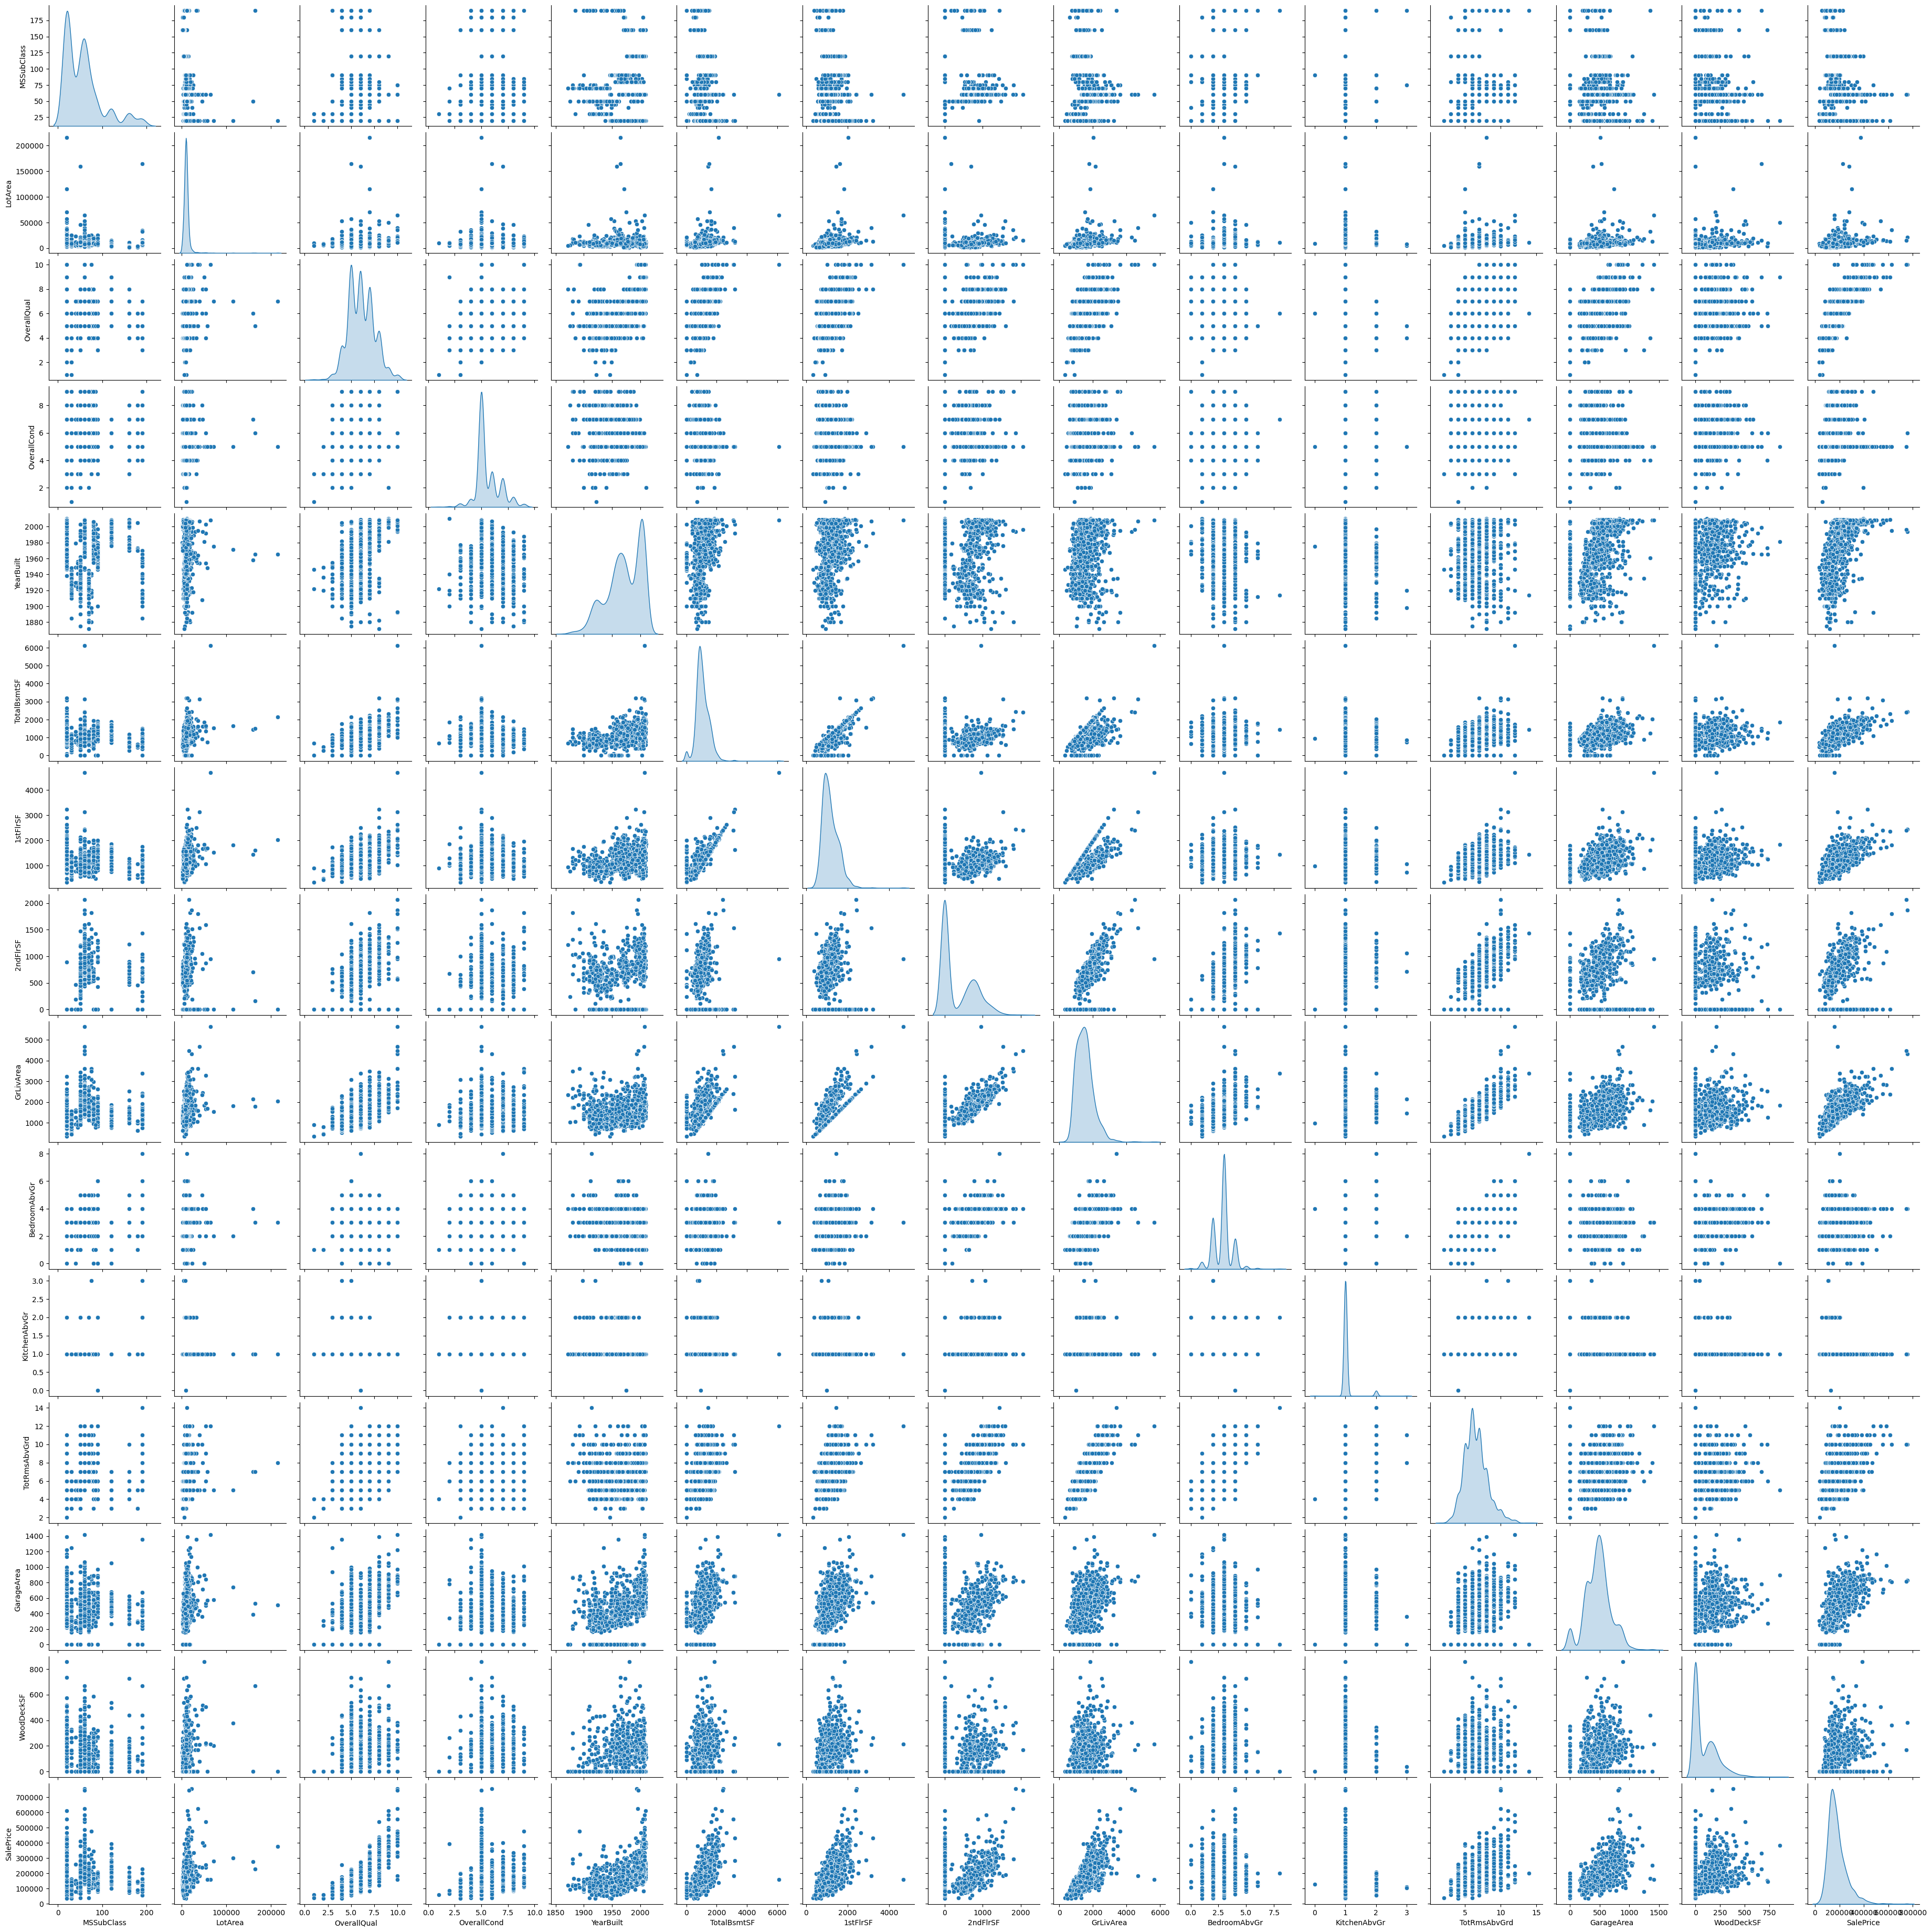

In [8]:
sns.pairplot(data_set[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea' , 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','GarageArea','WoodDeckSF', 'SalePrice']], diag_kind='kde')

In [9]:
data=data_set[['LotArea','TotalBsmtSF','GrLivArea' , 'BedroomAbvGr', 'KitchenAbvGr','GarageArea', 'SalePrice']]

In [10]:
data.shape

(1460, 7)

In [11]:
data_fl=data.astype(float).to_numpy()

In [12]:
np.random.shuffle(data_fl)

In [13]:
x=data_fl[:,:-1]

In [14]:
y=data_fl[:,-1]

In [15]:
y=tf.reshape(y,(1460,1))

In [16]:
x.shape,y.shape

((1460, 6), TensorShape([1460, 1]))

In [17]:
xtrain=x[:1200,:]
ytrain=y[:1200]
xtest=x[1200:1460,:]
ytest=y[1200:1460]

In [18]:
model = LinearRegression()

In [19]:
model.fit(xtrain,ytrain)

LinearRegression()

In [20]:
ypred=model.predict(xtest)[:260,0]

In [21]:
mserror = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f'Mean Squared Error: {mserror}')
print(f'R-squared: {r2}')

Mean Squared Error: 1648919331.733382
R-squared: 0.7666875446260202


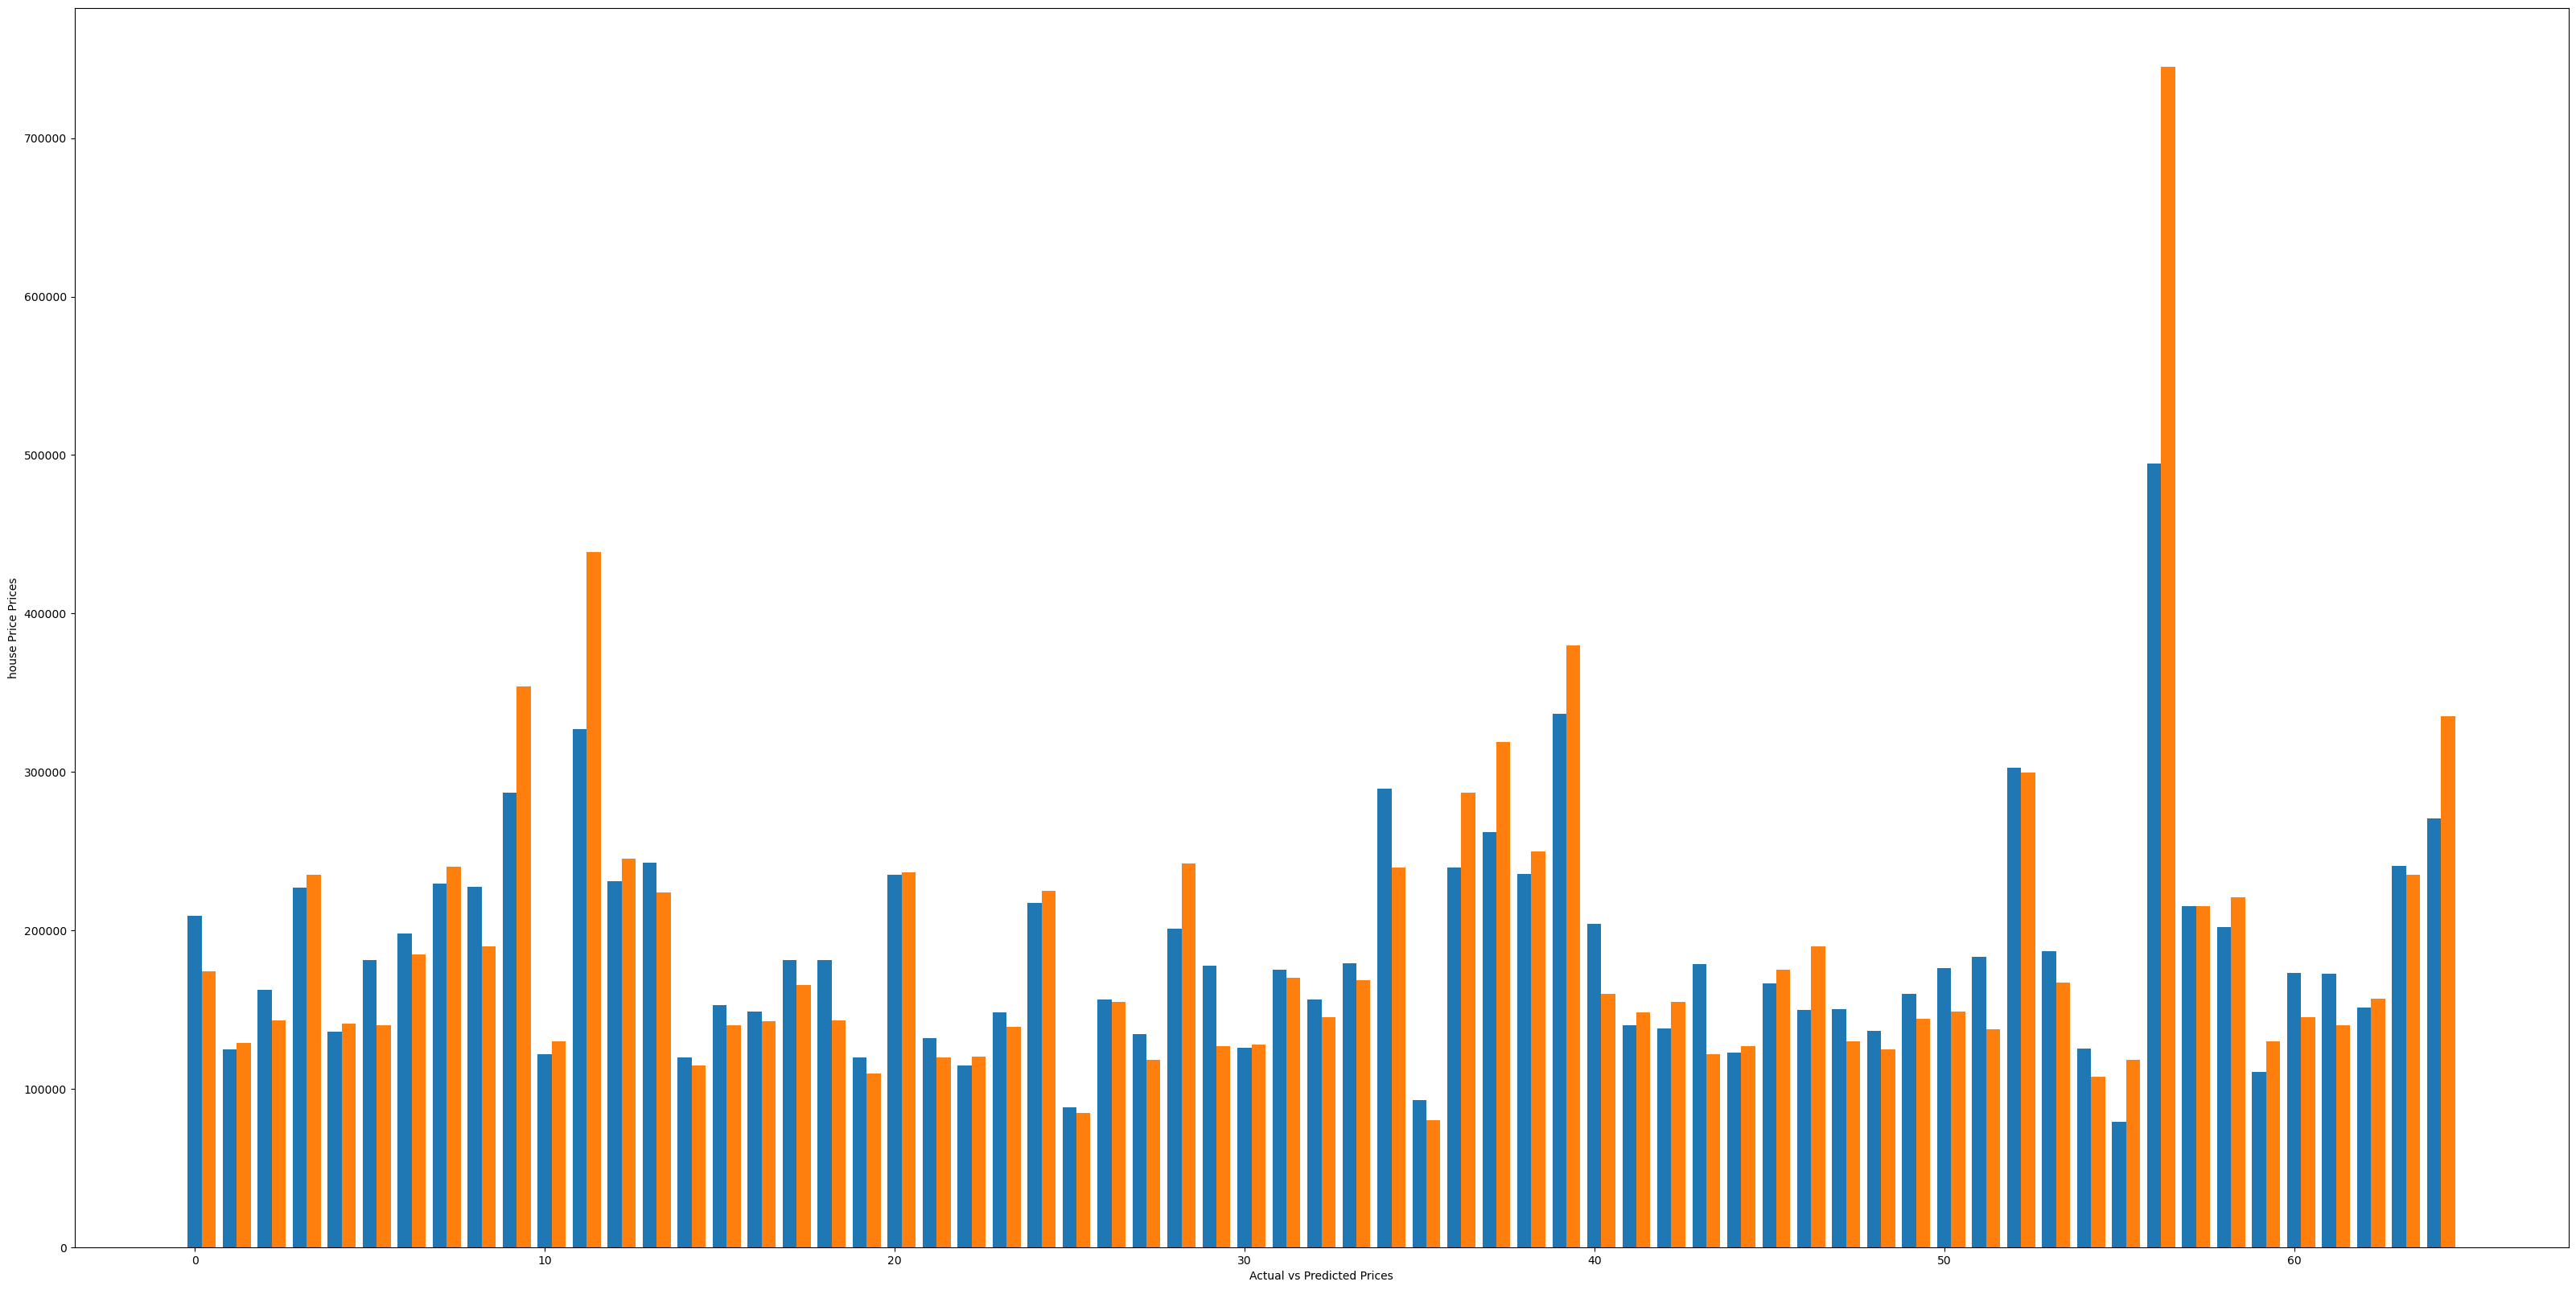

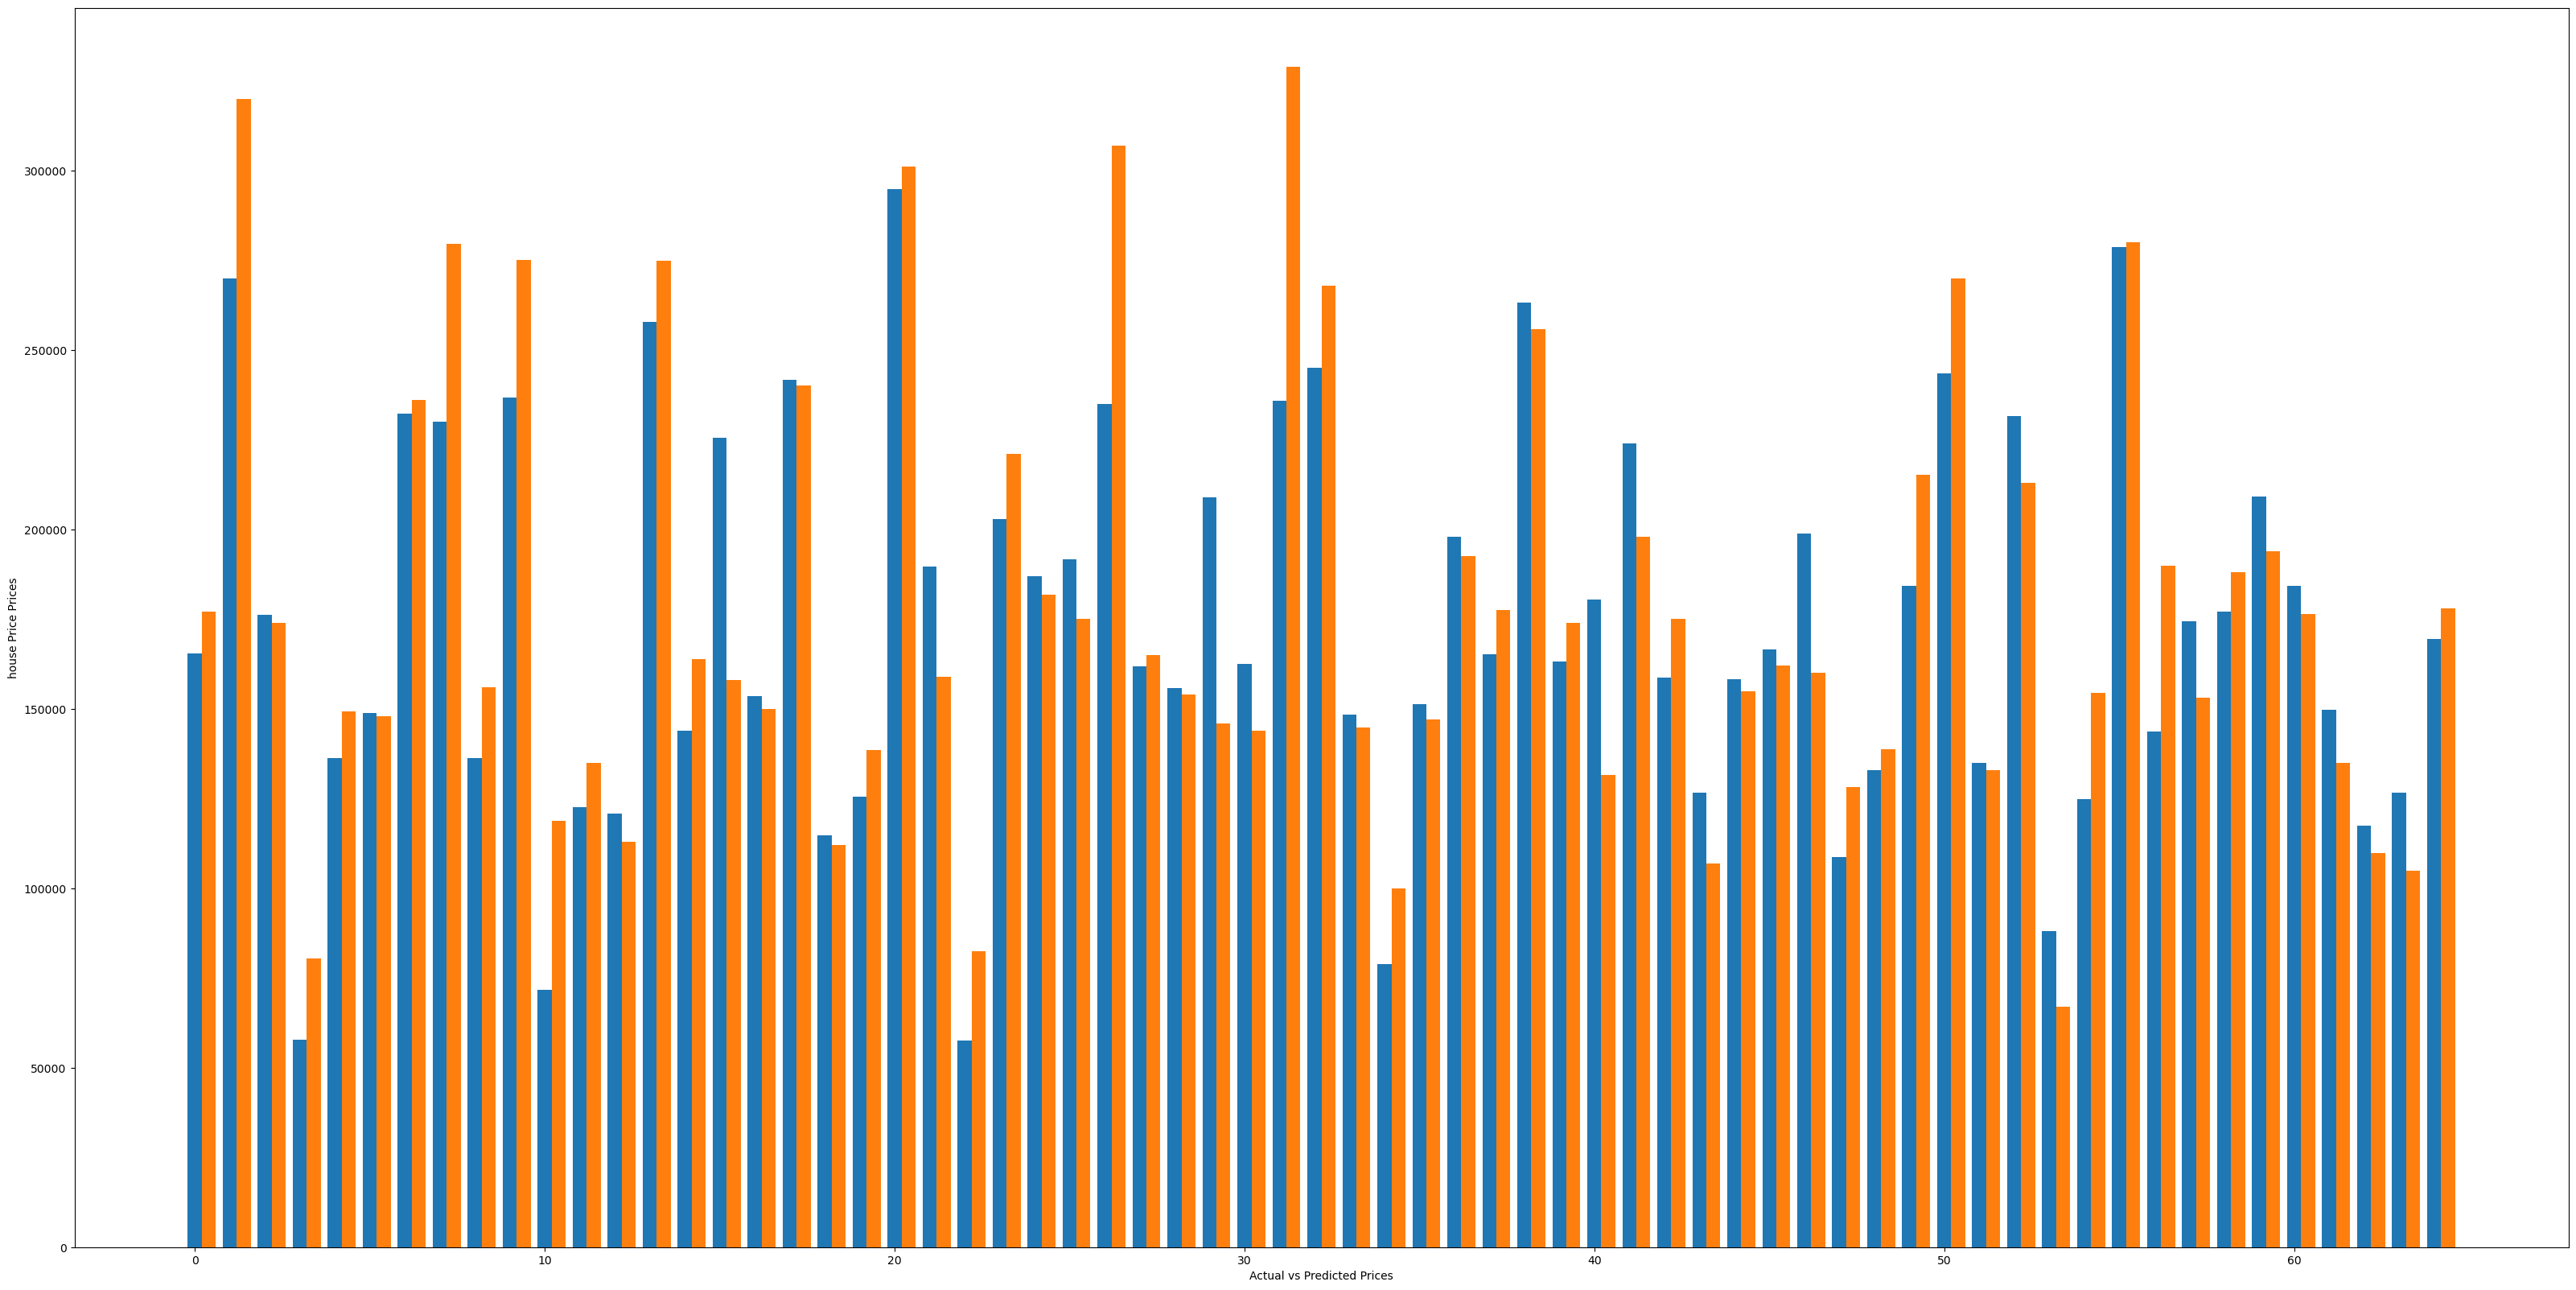

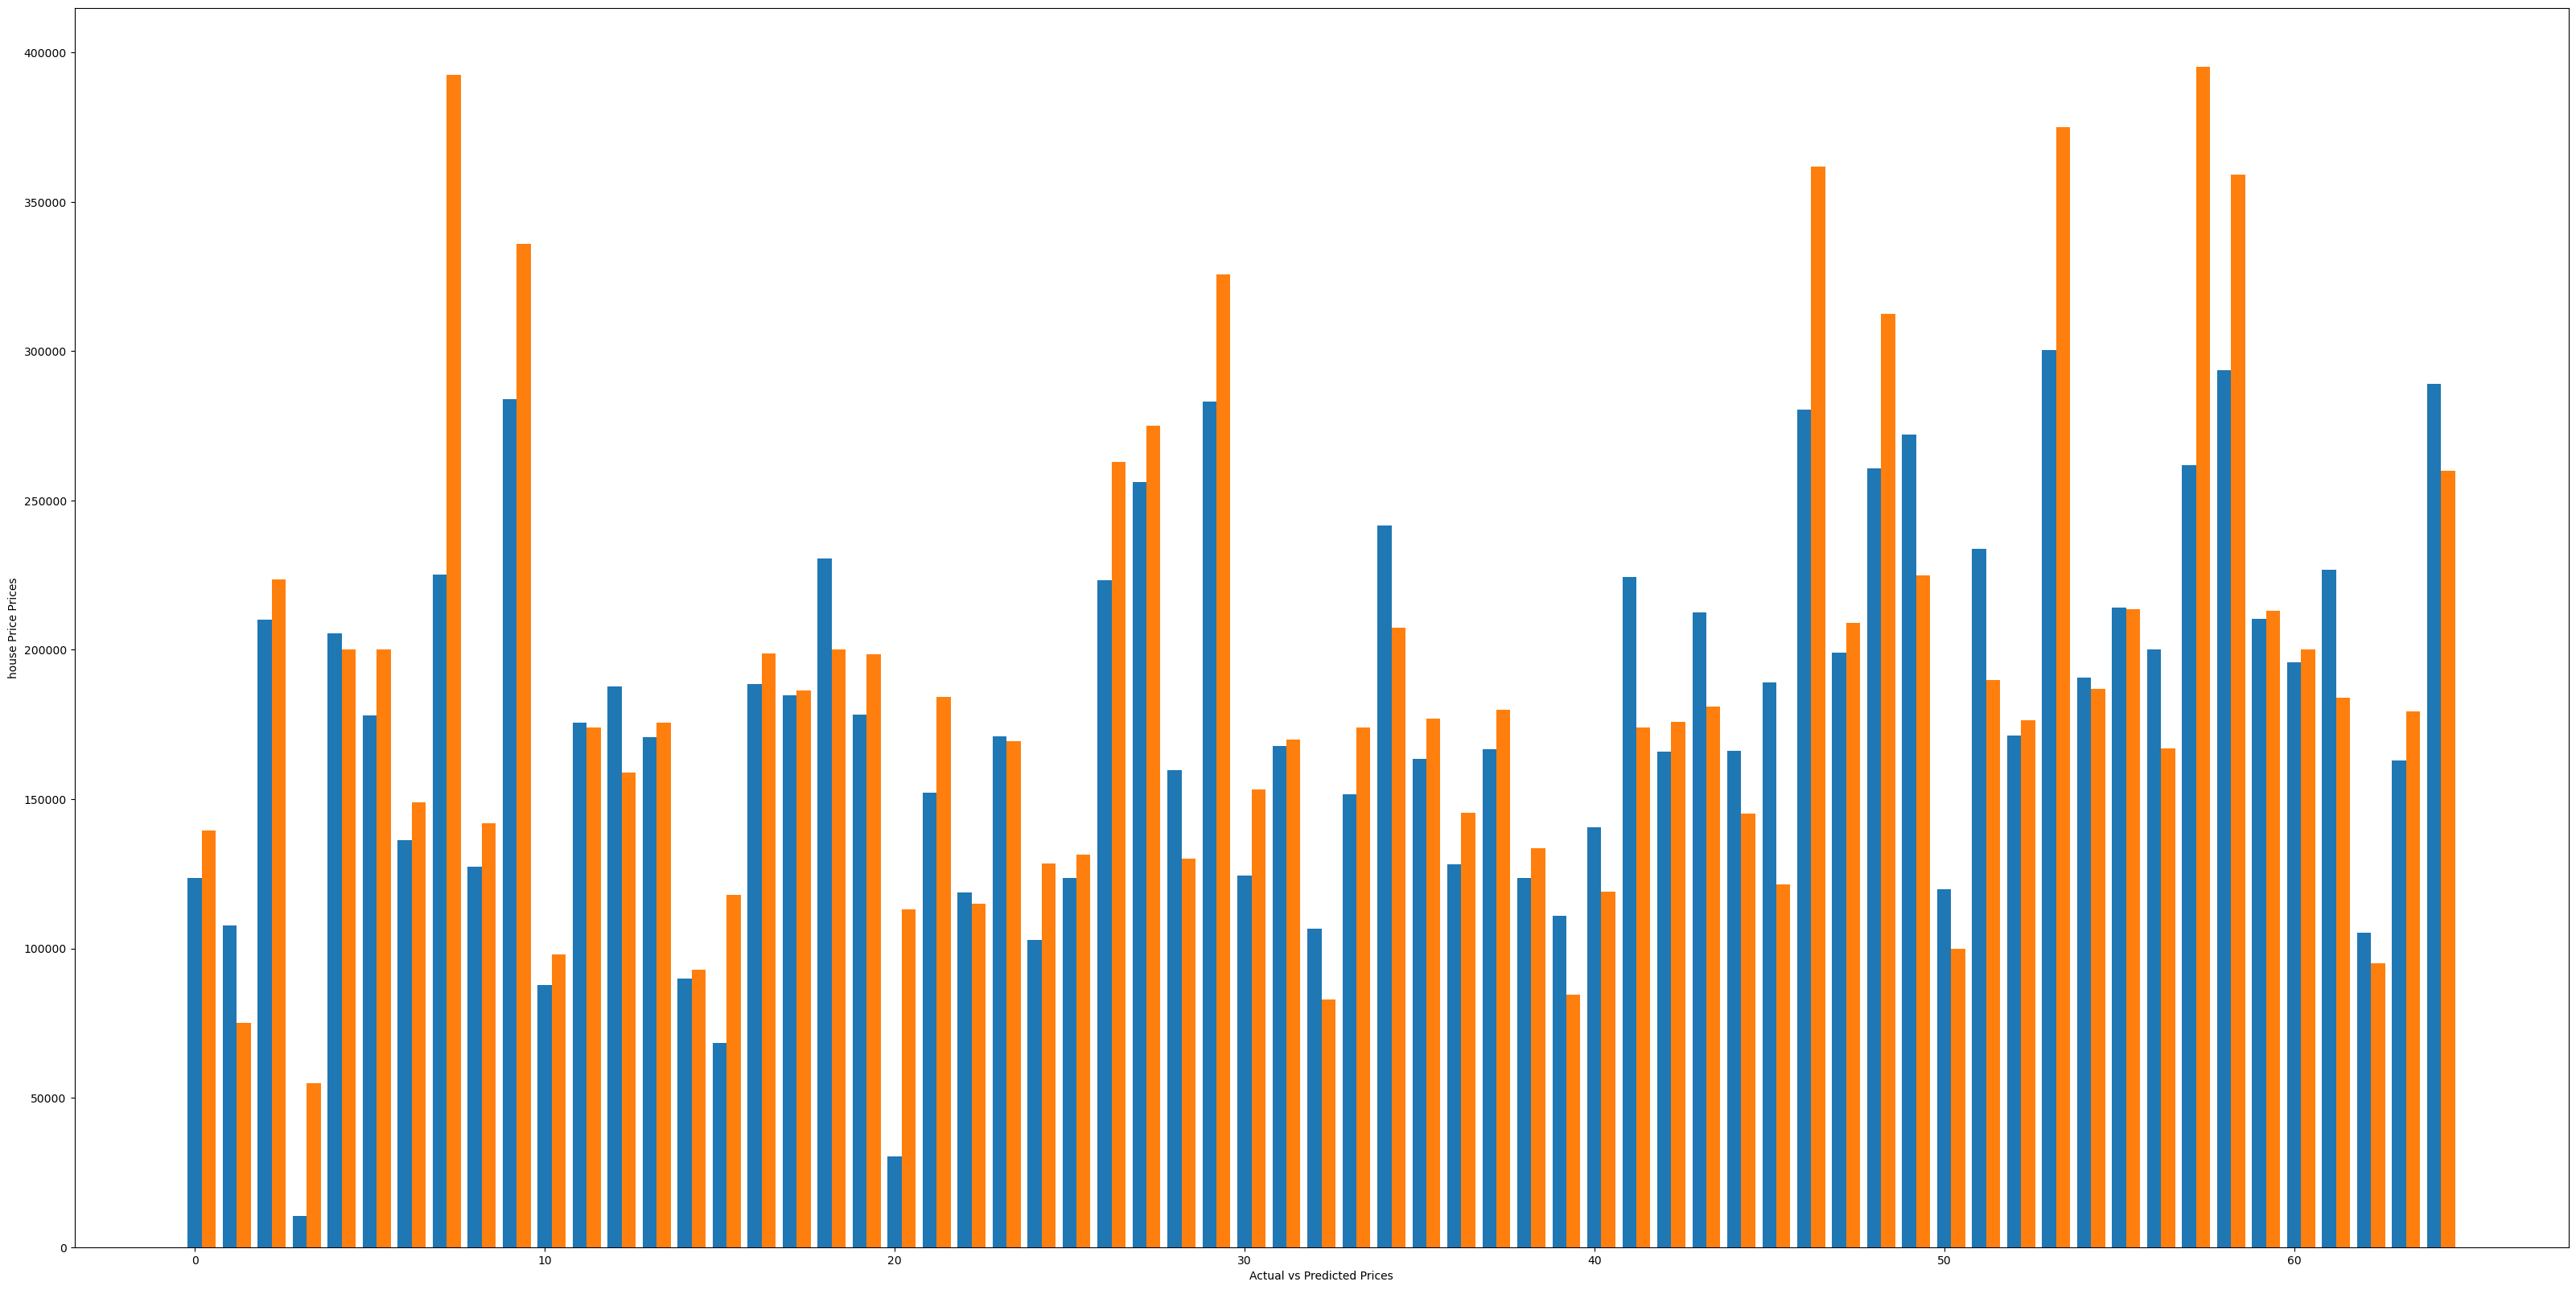

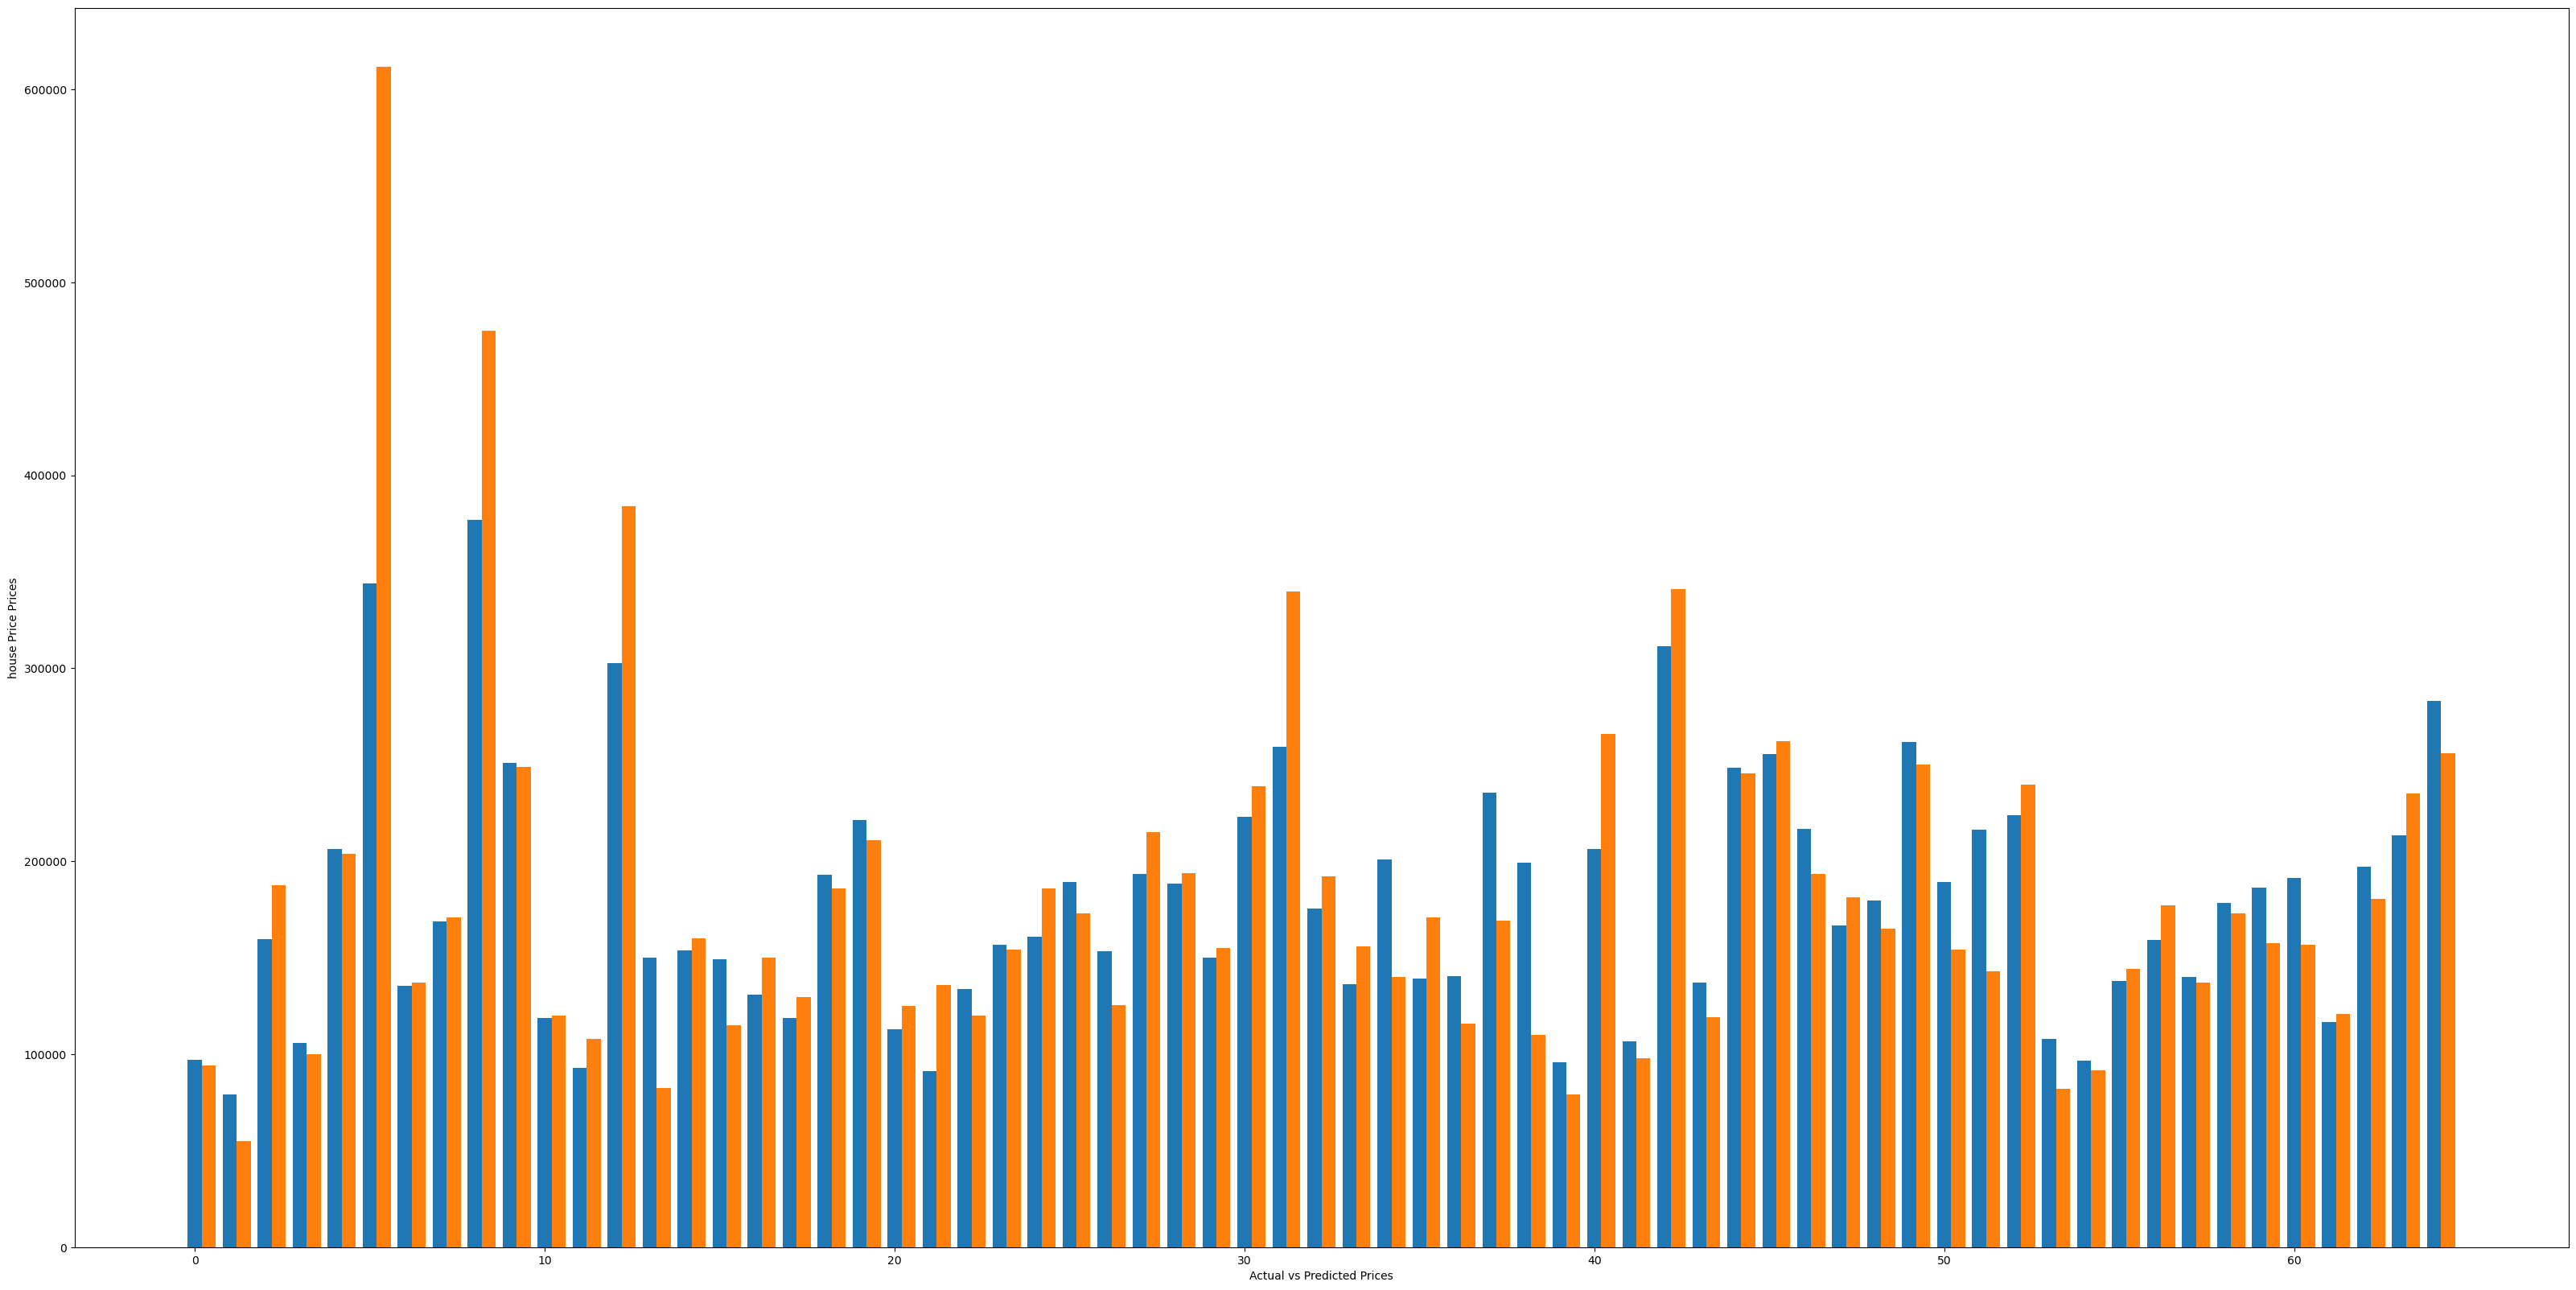

In [22]:
for i in range(4):
    y_true=ytest[65*i:65*(i+1),0]
    y_pred=ypred[65*i:65*(i+1)]
    ind = np.arange(65)
    plt.figure(figsize=(40,20))
    width = 0.4
    plt.bar(ind, y_pred, width, label='Predicted house Price')
    plt.bar(ind + width, y_true, width, label='Actual house Price')
    plt.xlabel('Actual vs Predicted Prices')
    plt.ylabel('house Price Prices')
    plt.show()